

# Project: Investigate a Dataset (TMDb Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that will be investigated is the TMDb movie dataset.  The dataset contains almost 10,900 movies, with information about those movies including revenue, budget, rating, cast, popularity, etc.

### Questions

1. Movie with most and least profit
2. Movie with largest and lowest budget
3. Movie with most and least revenue
4. Average rating in regards to vote rating average
5. Average Budget for profitable movie
6. Most succesful genres in regards to profit
7. Most popular cast in regards to profit
8. Most profitable director making movies 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

After looking at the dataset and to investigate the questions above, certain data can be deleted and keep only the data that is needed to make analysis easier and explanable. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
tmdb_dataset = pd.read_csv('tmdb-movies.csv')

#   types and look for instances of missing or possibly errant data.
tmdb_dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Initial Observations 

- Currency not identified in dataset.  Will assume US Dollars since most movies were made by Hollywood production studios in USA.

### Data Cleaning (Replace this with more specific notes!)

#### Steps needed to cleanup dataset:
1. Delete unused columns from dataset
2. Remove movies in database with missing data, such as 0 for budget and/or revenue
3. Remove any rows that have duplicates
4. Fix format for revenue and budget to int values


## Deleting unused data columns
<b>Deleting columns:</b> id, imdb_id, popularity, homepage, tagline, keywords, overview, runtime, production_companies, release_date, vote_count, release_year, budget_adj, revenue_adj


In [3]:
# List of columns to be removed
rem_columns = ['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 
               'release_date', 'vote_count', 'release_year', 'budget_adj', 'revenue_adj']

# Removing the columns
tmdb_dataset = tmdb_dataset.drop(rem_columns,1)

# Viewing updated dataset
tmdb_dataset.head()


,budget,revenue,original_title,cast,director,genres,vote_average
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.1
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3



## Deleting rows with values of 0 in their Budget and/or Revenue columns

In [4]:
# Creating list for budgets and revenue
list_budget_revenue = ['budget', 'revenue']

#Changing 0 values to NaN values in budget and revenue
tmdb_dataset[list_budget_revenue] = tmdb_dataset[list_budget_revenue].replace(0, np.NAN)

#Deleting rows with NaN value in budget/revenue list
tmdb_dataset.dropna(subset = list_budget_revenue, inplace = True)

rows, col = tmdb_dataset.shape
print('After deleting 0 values in Budget/Revenue columns, there are now only {} number of movies in the dataset.'.format(rows-1))

After deleting 0 values in Budget/Revenue columns, there are now only 3854 number of movies in the dataset.



## Deleting any found duplicate rows in dataset

In [5]:
#Original total rows in dataset
rows, cols = tmdb_dataset.shape
print('Total Rows in dataset with duplicates: {}'.format(rows-1))

# Deleting any duplicates if found
tmdb_dataset.drop_duplicates(keep ='first', inplace=True)

rows, col = tmdb_dataset.shape

print('Total Rows in dataset AFTER duplicates, if any, deleted: {}'.format(rows-1))

Total Rows in dataset with duplicates: 3854
Total Rows in dataset AFTER duplicates, if any, deleted: 3853



## Changing Buget and Revenue formats

In [6]:
#Viewing the data types for each column
tmdb_dataset.dtypes

dtype_change = ['budget', 'revenue']
#adjusting data types to budget and revenue
tmdb_dataset[dtype_change] = tmdb_dataset[dtype_change].applymap(np.int64)
#printing the changed information
print("Updated datatypes:")
tmdb_dataset.dtypes


Updated datatypes:


budget              int64
revenue             int64
original_title     object
cast               object
director           object
genres             object
vote_average      float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



## Question 1: Movie with most and least profit

In [7]:
# Finding the profit of each movie
tmdb_dataset.insert(2,'profit',tmdb_dataset['revenue'] - tmdb_dataset['budget'])

#Viewing dataset
tmdb_dataset.head()


,budget,revenue,profit,original_title,cast,director,genres,vote_average
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.1
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3


In [8]:
import pprint
def calculate_data(column):
    # Highest earned profit
    high = tmdb_dataset[column].idxmax()
    high_det = pd.DataFrame(tmdb_dataset.loc[high])
    
    # lowest earned profit
    low = tmdb_dataset[column].idxmin()
    low_det = pd.DataFrame(tmdb_dataset.loc[low])
    
    #collectin data in one place
    data = pd.concat([high_det, low_det], axis=1)
    
    return data

calculate_data('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_average,7.1,6.4


Column ID <b>2244</b><br>
Movie Title: The Warriors Way<br>
Lowest Profit = <font color = "red">-$413912431</font>

Column ID: <b>1385</b><br>
Movie Title: Avatar<br>
Highest Profit = <font color = "green">$2544505847</font>

## Question 2: Movie with largest and lowest budget

In [9]:
# Use function calculate_data from above
calculate_data('budget')


,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
vote_average,6.4,4.8


Column ID <b>2618</b><br>
Movie Title: Lost & Found<br>
Lowest Budget = $1

Column ID: <b>2244</b><br>
Movie Title: The Warrior's Way<br>
Highest Budget = $425000000


## Question 3: Movie with most and least revenue

In [10]:
#Use function calculate data from above
calculate_data('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
vote_average,7.1,6.4


Column ID <b>5067</b><br>
Movie Title: Shattered Glass<br>
Lowest Revenue = $2

Column ID: <b>1386</b><br>
Movie Title: Avatar<br>
Highest Revenue = $2781505847

## Question 4: Average Movie Rating by vote average

In [11]:
# Creating function for average
def avg_data(column):
    return tmdb_dataset[column].mean()

In [12]:
#Calling average function for voting average for all movies in dataset
avg_data('vote_average')

6.168162947586924

Average voting rating: (rounded) <br>
<b>6.17</b>

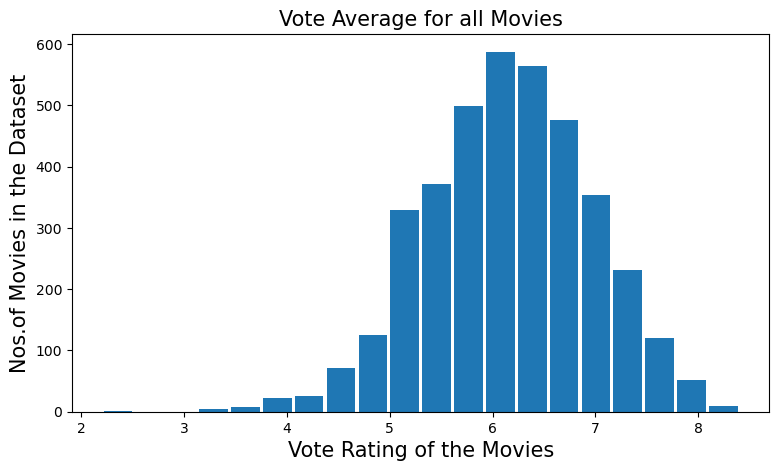

In [13]:
#histogram of runtime of movies

# figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)
#x-axis 
plt.xlabel('Vote Rating of the Movies', fontsize = 15)
#y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#title of graph
plt.title('Vote Average for all Movies', fontsize=15)

#histogram plot
plt.hist(tmdb_dataset['vote_average'], rwidth = .9, bins = 20)
#displays the plot
plt.show()

### The histogram shows a normal distribution for voting average in the movie dataset.  The most common rating in movies falls between 5 - 7 rating.

In [14]:
# More specific vote average data:
tmdb_dataset['vote_average'].describe()

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

### The above data concludes that: 
- 75% of the movies have less than a 6.7 vote average
- The average vote for a movie is less than 6.17 (mean average)
- The movie with the highest vote average is 8.4

## <i>Recleaning data set to show only movies that made a profit of over 75 million dollars</i>

In [15]:
#selecting the movies having profit $75M or more
profit_movies = tmdb_dataset[tmdb_dataset['profit'] >= 75000000]

#indexing new data
profit_movies.index = range(len(profit_movies))

#start from 1 instead of 0
profit_movies.index = profit_movies.index + 1

#printing the changed dataset
profit_movies.head()

,budget,revenue,profit,original_title,cast,director,genres,vote_average
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.1
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3


In [16]:
#New count of data set:
print("New dataset movie count: " + str(len(profit_movies)))

New dataset movie count: 1028


## Question 5: Average Budget for profitable movie

In [17]:
# Average budget for profitable movies
profit_movies['budget'].mean()

67622049.72081712

## The average budget (rounded) for profitable movies above 75 million dollars is:  <font color = "green">$67622050</font>


In [18]:
#function which will take a column as an argument, split, and keep track 
def data_track(column):
    #take a column, and separate string by '|'
    data_split = profit_movies[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_split = pd.Series(data_split.split('|'))
    
    #arranging in descending order
    count = data_split.value_counts(ascending = False)
    
    return count

## Question 6: Most succesful genres in regards to profit 

In [19]:
# Total counts for genres
genre_count = data_track('genres')
genre_count.head()

Comedy       377
Action       368
Drama        352
Adventure    313
Thriller     292
dtype: int64

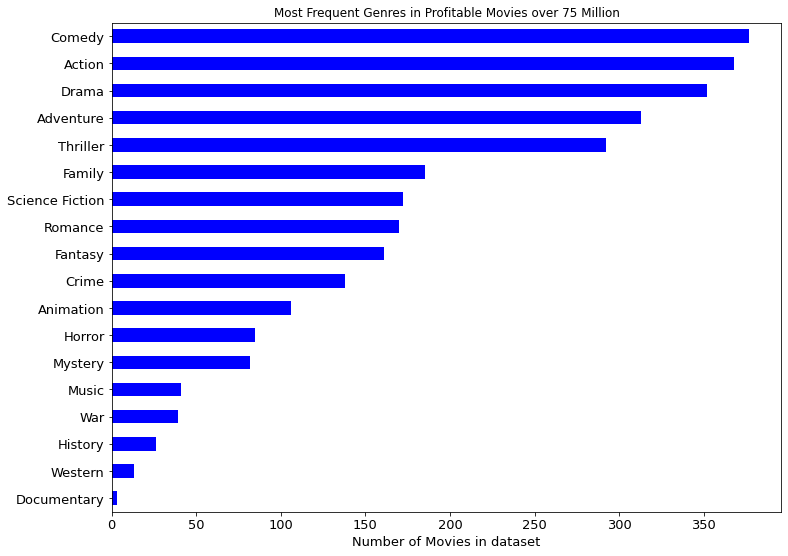

In [20]:
#Plotting the points in descending order top to bottom.
genre_count.sort_values(ascending = True, inplace = True)

#ploting
lt = genre_count.plot.barh(color = '#0000ff', fontsize = 13)

#title
lt.set(title = 'Most Frequent Genres in Profitable Movies over 75 Million')

# on x axis
lt.set_xlabel('Number of Movies in dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

## Question 7: Most popular cast in regards to profit

In [21]:
# Total counts for cast
cast_count = data_track('cast')
cast_count.head()

Tom Cruise            26
Tom Hanks             20
Sylvester Stallone    19
Brad Pitt             19
Adam Sandler          18
dtype: int64

## Question 8: Most profitable Director making movies with 75 million dollar profit

In [22]:
# Total movie count for director
director_count = data_track('director')
director_count.head()

Steven Spielberg    22
Robert Zemeckis     12
Ridley Scott        10
Tim Burton           9
Michael Bay          8
dtype: int64

<a id='conclusions'></a>
## Conclusions

After this analysis, we can conclude that for a movie to have the highest chances of being profitable:

1. The average budget must be around 67 millon dollars
2. The genre should be Comedy, Action, Adventure, Drama, or Thriller
3. Tom Cruise, Tom Hanks, Sylvester Stallone, Brad Pitt, or Adam Sandler should be casted 
4. The movie should be directed by Steven Spielberg, Robert Zemeckis, Ridley Scott, Tim Burton, or Michael Bay

By doing all this the movie has a good chance of being a blockbuster and making a profit of greater than 75 million dollars

Alalytical Limits: This analysis was done considering movies that had a significant amount of profit of 75 million dollars or greater. This may not be free of any errors but by following these suggestions, the probability increases of the movie becoming a blockbuster. Also it is not certain if the data provided is 100% correct and updated. The budget and revenue columns do not have currency unit, so its possible that different movies have budgets in currencies according to the country they were produced in. To add, dropping rows with missing values also affected the analysis and possible outcome.
